# Simple and Stacked Autoencoder with MNIST - Dense

- fashion_mnist dataset 을 이용한 deep autoencoder 생성


- Mnist dataset 의 손글씨체를 encoding 후 decoding 하여 복원  

`plot_model` 사용을 위해서 `conda install pydot`, `conda install graphviz` 로 graphviz 와 pydot 설치

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

sample image 시각화

In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data() 
# 원래 정답 데이터도 같이 주게 되었는데 지금 비지도 학습을 하고 있기에 X_train,test만 사용
X_train.shape

(60000, 28, 28)

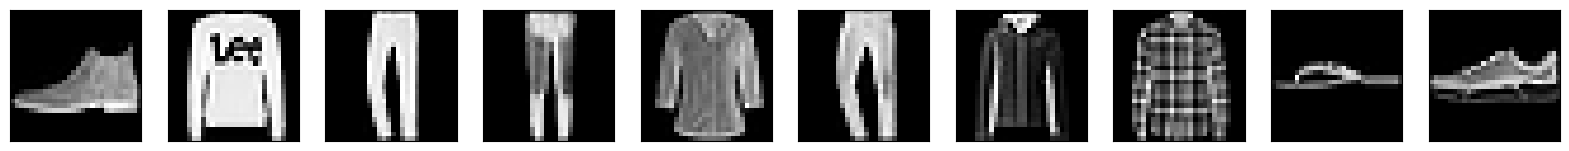

In [3]:
fig, ax = plt.subplots(1, 10, figsize=(20, 4)) # 6만개 중에 10개만 시각화

for i in range(10):
    ax[i].imshow(X_test[i], cmap='gray') # 이미지 시각화 함수 imshow()
    ax[i].set_xticks([])
    ax[i].set_yticks([])

- data normalization  
- 2차원 image 를 1 차원으로 변경

In [4]:
X_train[0] # 검정화면은 픽셀 0으로 표시

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train / 255. # 심필 스케일링
X_test = X_test / 255.

X_train = X_train.reshape(-1, 784) # flatten--> 28x28을 784로 reshape
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# stacked autoencoder 작성

In [ ]:
# relu = max(0,x) #x값이 0보다 작은 것은 0으로, 0보다 크면 y = x인 비선형 함수 

In [13]:
inp = Input(shape=(784,))
x = Dense(128, activation = "relu")(inp)
x = Dense(64, activation = "relu")(x) # 전 단계의 출력을 입력으로 해서 출력을 내보냄 
encoder = Dense(32, activation = "relu")(x)

x = Dense(64, activation = "relu")(encoder) # encoder의 출력을 디코더의 입력으로 받음
x = Dense(128, activation = "relu")(x) # 점점 units의 수를 늘린다

# 원본 데이터가 784인데 0~1 사이의 값으로 정규화 해줬음 
decoder = Dense(784, activation = "sigmoid")(x) # 0~1 사이의 값을 만들어주는 게 Sigmoid 함수

# 훈련이 되려면 역전파가 같이 일어나야하는데 이전까진 선언만 하고, 하나의 모델로 합쳐지지 않음
# encoder_model은 위에 1번째 줄을 입력을 받아서 4번째 줄까지 하나의 모델로 선언을 했구나 
encoder_model = Model(inputs=inp, outputs=encoder) # 여러 개의 input으로 받을 수가 있기 때문에 list로 받을 수 있음
autoencoder = Model(inputs=inp, outputs=decoder) # 전체 가중치가 훈련이 된다. 

# 출력이 sigmoid(이진분류): 이진분류 손실함수 --> binary_crossentropy
autoencoder.compile(loss="binary_crossentropy", optimizer = "adam")
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)            ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ input_layer_2           │ (None, 784)       │         0 │
│ (InputLayer)            │                   │           │
├─────────────────────────┼───────────────────┼───────────┤
│ dense_12 (Dense)        │ (None, 128)       │   100,480 │
├─────────────────────────┼───────────────────┼───────────┤
│ dense_13 (Dense)        │ (None, 64)        │     8,256 │
├─────────────────────────┼───────────────────┼───────────┤
│ dense_14 (Dense)        │ (None, 32)        │     2,080 │
├─────────────────────────┼───────────────────┼───────────┤
│ dense_15 (Dense)        │ (None, 64)        │     2,112 │
├─────────────────────────┼───────────────────┼───────────┤
│ dense_16 (Dense)        │ (None, 128)       │     8,320 │
├─────────────────────────┼───────────────────┼───────────┤
│ dense_17 (Dense)        │ (None, 784)       │   101,136 │
└─────────────────────────┴───────────────────┴───────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

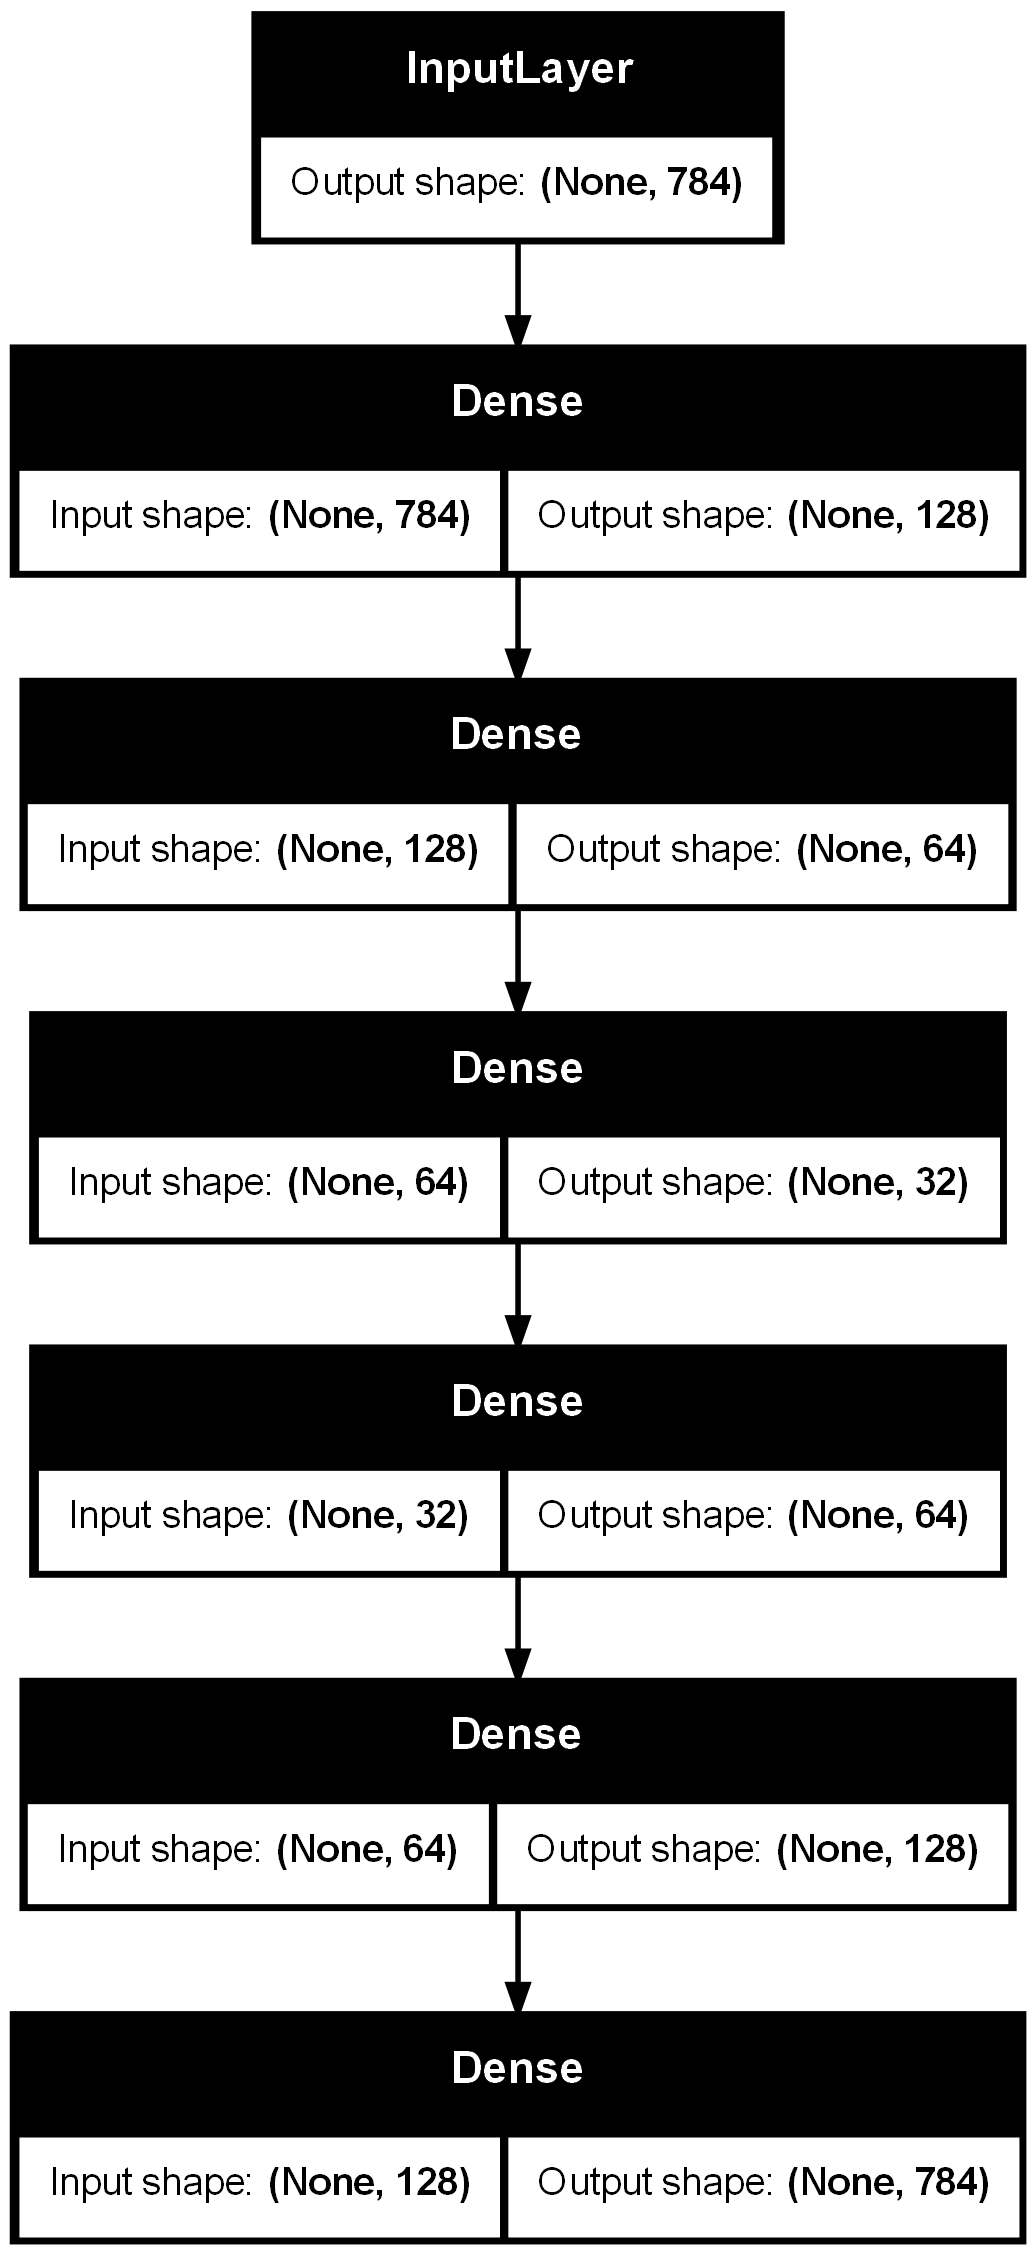

In [15]:
plot_model(autoencoder, show_shapes = True)

In [19]:
history = autoencoder.fit(
    X_train, X_train, 
    epochs = 50, 
    shuffle = True, 
    batch_size = 256,
    validation_data=(X_test, X_test)
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.2904 - val_loss: 0.0092
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0091 - val_loss: 0.0088
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

KeyboardInterrupt: 

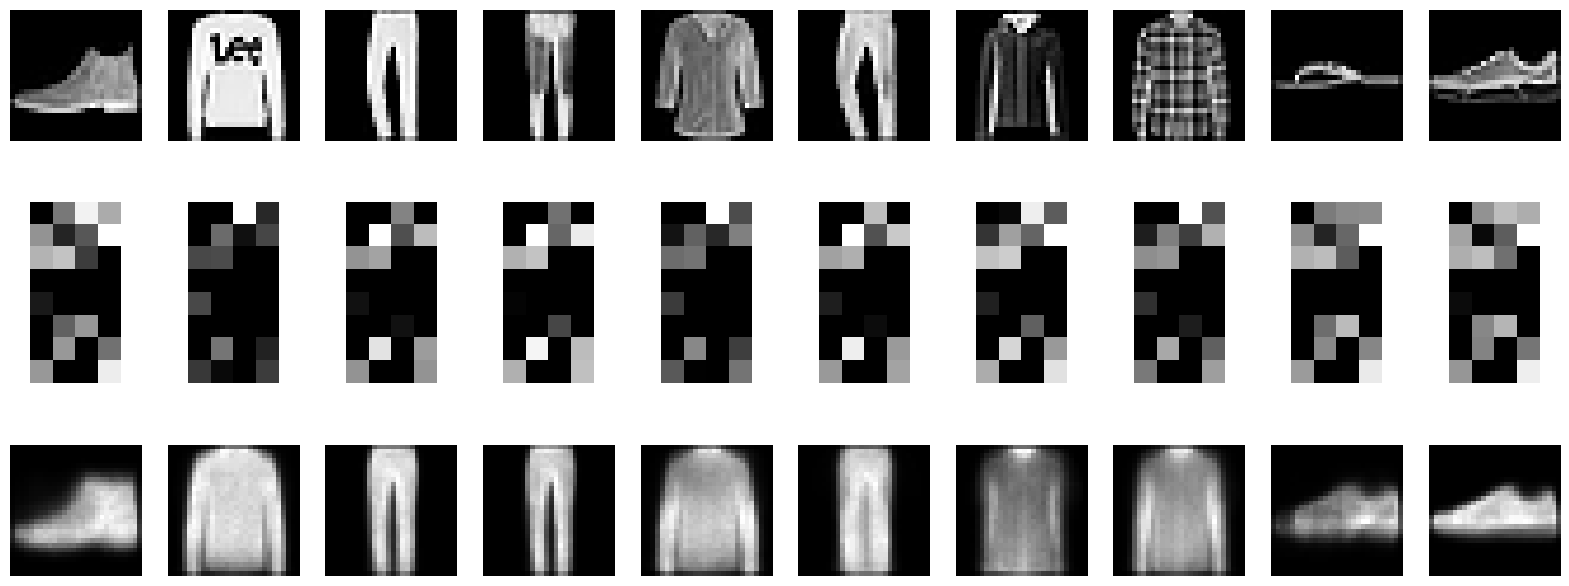

In [20]:
fig, ax = plt.subplots(3, 10, figsize=(20, 8)) # row는 3개, column은 10개인 subplot 생

for i in range(10): # 테스트 데이터 10개 
    # 첫번째 행은 원본 이미지 
    ax[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray') # 2차원 배열로 다시 reshape
    
    img = np.expand_dims(X_test[i], axis=0)
    # laten presentation : 인코더 모델로 해서 잠재 표현을 시각화 해보기 위해서 인코더 모델에 predict으로 줬음
    # 32차원으로 압축된 이미지를 시각화 
    ax[1, i].imshow(encoder_model.predict(img, verbose=0).reshape(8, 4), cmap='gray')

    # 28x28로 다시 reshape해서 이미지 복원 --> 비슷하게 나왔는데 체크 무늬같은 정보가 손실되었음
    # 정보의 손실이 조금 생겼지만 그래도 구분이 가능 
    ax[2, i].imshow(autoencoder.predict(img, verbose=0).reshape(28, 28), cmap='gray')
    
    ax[0, i].axis('off')
    ax[1, i].axis('off')
    ax[2, i].axis('off')

- model summary 및 시각화